In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.isnull().sum().sum()

0

In [4]:
X=df.drop('quality',axis=1)
y=df['quality']

print("Shape of X= ",X.shape)
print("Shape of y= ",y.shape)

Shape of X=  (1143, 12)
Shape of y=  (1143,)


C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(44.25, 0.5, '')]

C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


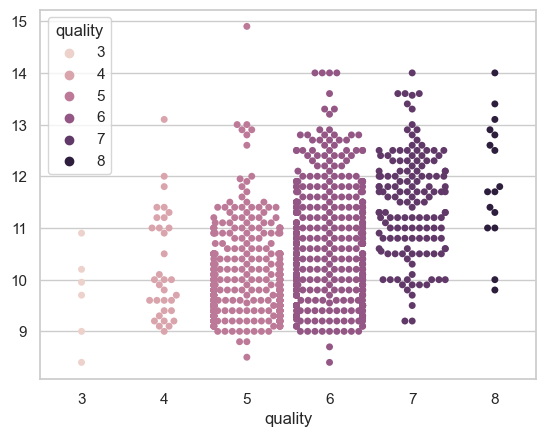

In [77]:
ax = sns.swarmplot(data=df, x="quality", y="alcohol", hue="quality")
ax.set(ylabel="")

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=51)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
#lr.score(X_test,y_test)

LinearRegression()

In [38]:
lr.coef_

array([ 0.06568841, -0.18320737, -0.01201539,  0.02381056, -0.11134916,
        0.03020954, -0.10793471, -0.07212268, -0.03739795,  0.15289084,
        0.27064738, -0.02609471])

In [39]:
lr.intercept_

5.671250000000006

In [40]:
#wquality=[11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3]

wquality=[7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2]

#wquality=[5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595]

#wquality=[6,0.700,0.20,2.45,0.099,40.0,49.0,0.99999,4.57,0.87,16.2,1598]

In [41]:
wquality=np.array([wquality])
wquality

array([[7.80e+00, 7.60e-01, 4.00e-02, 2.30e+00, 9.20e-02, 1.50e+01,
        5.40e+01, 9.97e-01, 3.26e+00, 6.50e-01, 9.80e+00, 2.00e+00]])

In [42]:
lr.predict(wquality)

array([3.21880039])

In [43]:
pred=lr.predict(wquality)
pred

array([3.21880039])

In [47]:
y_test

867     5
433     5
329     6
731     6
864     6
       ..
1045    7
908     6
659     5
801     7
218     5
Name: quality, Length: 343, dtype: int64

<Axes: >

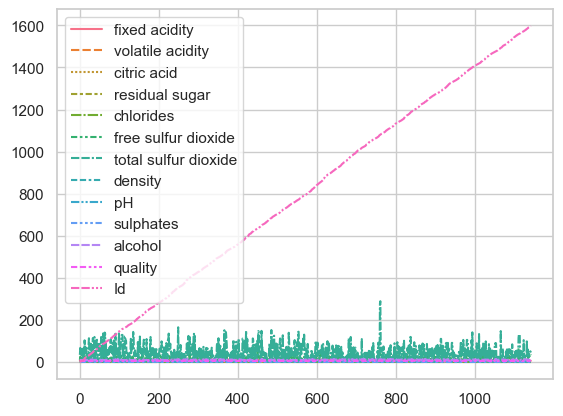

In [64]:
sns.lineplot(data=df)


In [48]:
X_test[0,:]

array([ 0.41018143,  0.27878797, -0.09001247, -0.39974763,  0.37385472,
       -0.76503306, -0.79917354,  0.5228458 , -0.25306908,  0.33888759,
       -0.79898391,  0.89749932])

In [69]:
y_pred=lr.predict([X_test[0,:]])
y_pred

array([5.44410549])

In [87]:
lr.predict(X_test)

array([5.44410549, 5.65314214, 6.94135993, 5.55762856, 6.07562702,
       6.02508941, 5.21728752, 5.29128206, 5.53317859, 5.70950513,
       6.11318593, 5.44471851, 5.69775926, 5.34714318, 5.45962699,
       5.9259769 , 5.10958152, 5.76573488, 5.97186291, 6.54226597,
       5.46339485, 5.24440778, 6.26158557, 5.67002171, 5.11178155,
       6.14623677, 6.0013974 , 5.20991038, 5.55095422, 5.38894573,
       5.86355265, 4.92362693, 5.73495465, 5.02490443, 5.80252626,
       5.67192783, 5.59014821, 5.36646988, 5.2561152 , 5.35129478,
       5.34698037, 5.21500186, 5.41830843, 5.18198005, 5.52821045,
       5.86905896, 5.22005579, 5.55918391, 5.31054694, 5.44638836,
       5.28511871, 5.56943513, 5.31058314, 4.77025848, 5.9929821 ,
       6.24773025, 5.37535996, 5.77320083, 5.22362365, 5.38748364,
       5.96111965, 6.27551928, 5.91453452, 5.72288448, 6.08445536,
       5.60226433, 5.82580079, 5.15566903, 5.2048965 , 5.43536498,
       5.64919378, 5.016742  , 5.61949179, 5.74445056, 6.00293

In [51]:
y_test

867     5
433     5
329     6
731     6
864     6
       ..
1045    7
908     6
659     5
801     7
218     5
Name: quality, Length: 343, dtype: int64

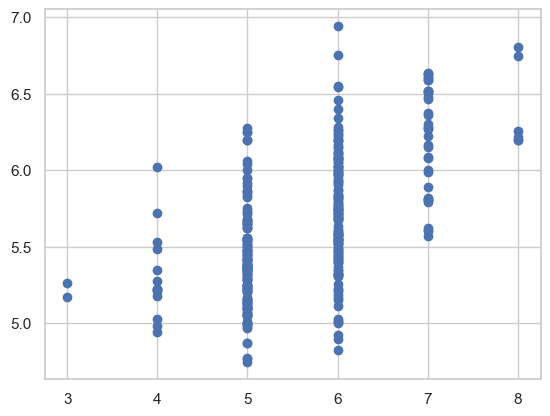

In [86]:
plt.scatter(y_test,y_pred)